In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re

In [53]:
df = pd.read_excel('netflix_titles.xlsx')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25 00:00:00,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      6175 non-null   object
 4   cast          7984 non-null   object
 5   country       7978 non-null   object
 6   date_added    8799 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8805 non-null   object
 9   duration      8806 non-null   object
 10  listed_in     8809 non-null   object
 11  description   8809 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.0+ KB


In [55]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [56]:

df.fillna({'director':'Unknown'}, inplace=True)

df.fillna({'cast':'Unknown'}, inplace=True)

df.fillna({'country':'Unknown'}, inplace=True)

df.fillna({'date_added':'2000-01-01'}, inplace=True)

df.fillna({'rating':'Not Rated'}, inplace=True)

df.fillna({'duration':'No Duration specified'}, inplace=True)

df['date_added'] = pd.to_datetime(df['date_added'])






In [57]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

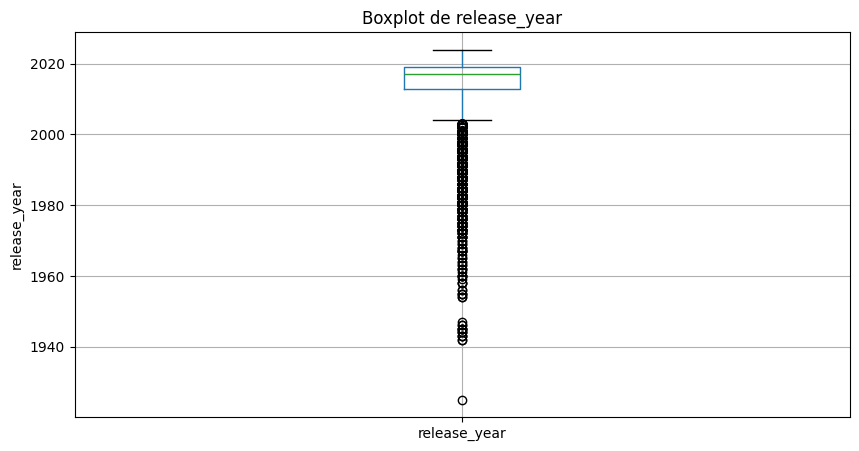

In [58]:
def graficos_boxplot(df):
	  
	  # Selecciona solo las columnas numéricas
    df_numerico = df.select_dtypes('number')
    
    # Itera sobre cada columna numérica
    for columna in df_numerico.columns:
        plt.figure(figsize=(10, 5))
        df.boxplot(column=columna)
        plt.title(f'Boxplot de {columna}')
        plt.ylabel(columna)
        plt.show()
        

graficos_boxplot(df)

In [59]:
df.country.value_counts()

country
United States                             2819
India                                      972
Unknown                                    831
United Kingdom                             419
Japan                                      245
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 749, dtype: int64

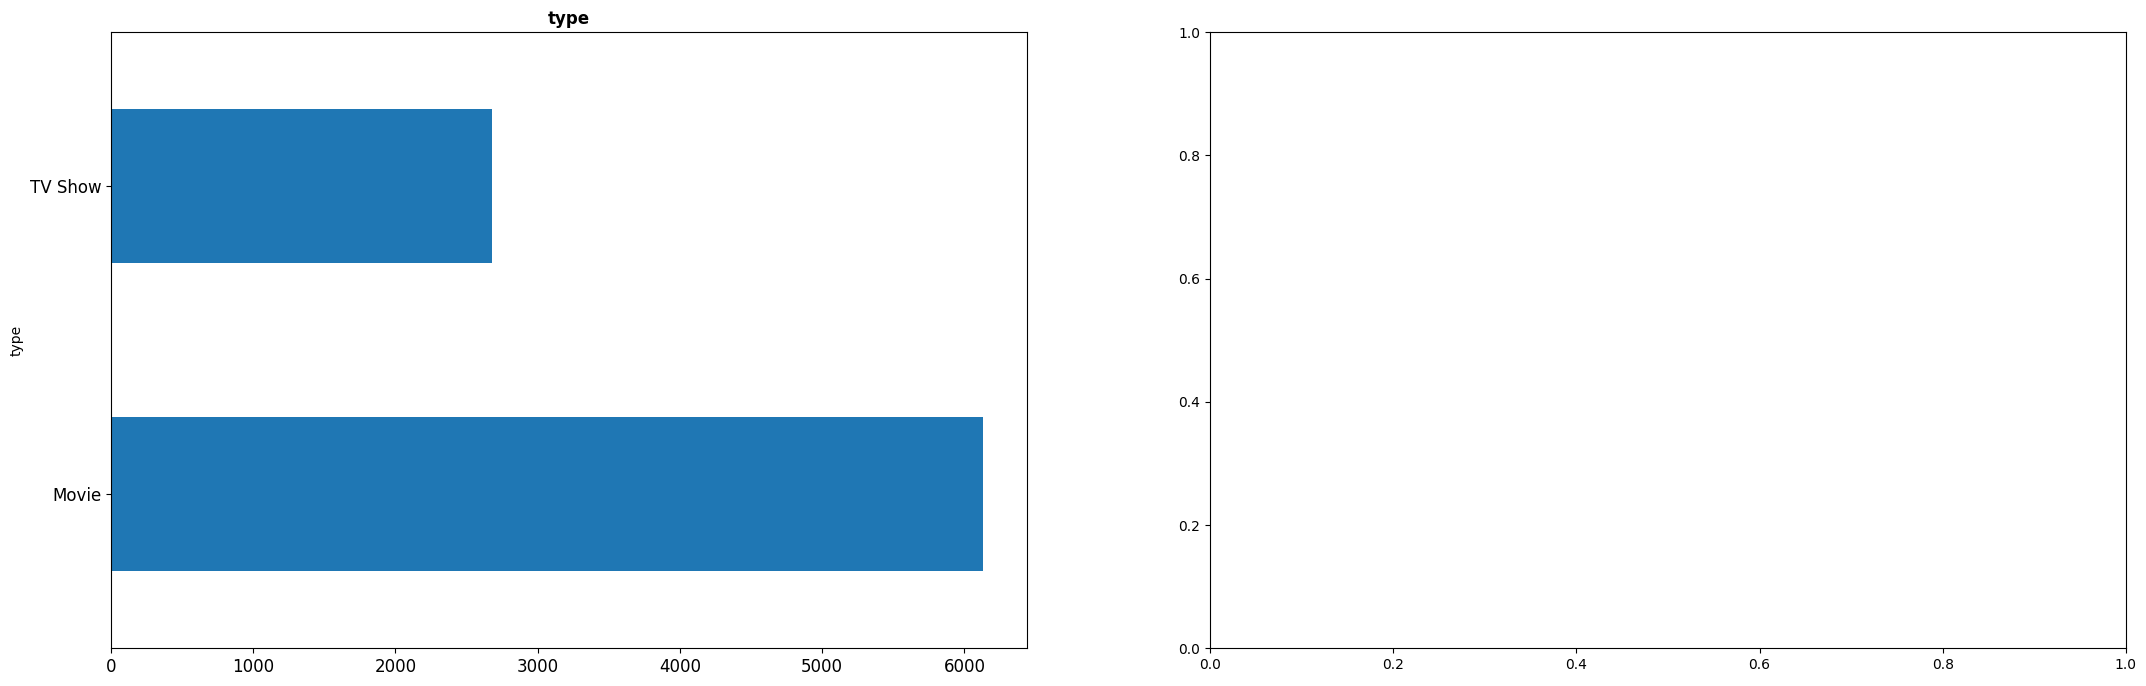

In [60]:
def graficos_eda_categoricos(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (26, filas * 8))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)
        
graficos_eda_categoricos(df.select_dtypes('O').loc[:,['type']])

type
Movie      6132
TV Show    2677
Name: count, dtype: int64


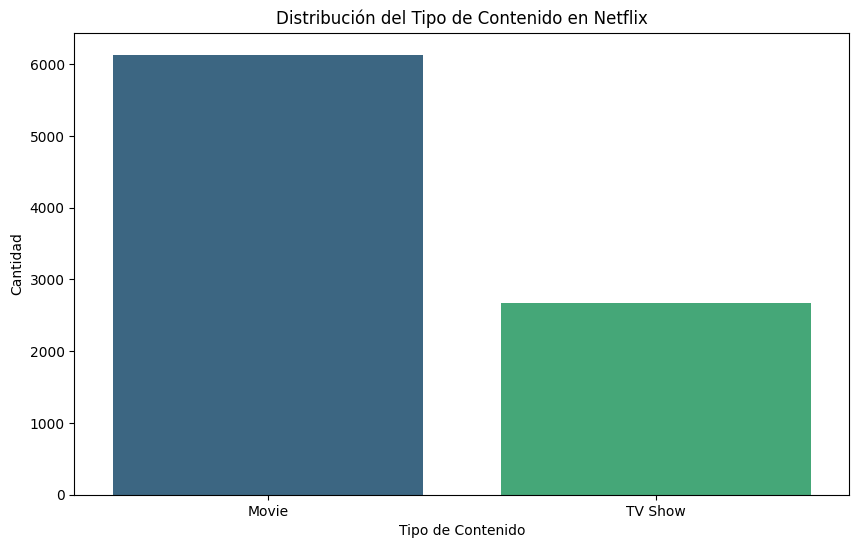

In [61]:
type_counts = df['type'].value_counts()
print(type_counts)

movies = df[df.type == 'Movie']
tv_shows = df[df.type == 'TV Show']

plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df, palette='viridis', hue='type', dodge=False, legend=False)
plt.title('Distribución del Tipo de Contenido en Netflix')
plt.xlabel('Tipo de Contenido')
plt.ylabel('Cantidad')
plt.show()


In [62]:
df.country.value_counts()

country
United States                             2819
India                                      972
Unknown                                    831
United Kingdom                             419
Japan                                      245
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 749, dtype: int64

country
United States     2752
India              962
United Kingdom     532
Unknown            440
Canada             319
France             303
Germany            182
Spain              171
Japan              119
China              114
Mexico             111
Egypt              102
Hong Kong          100
Nigeria             94
Australia           94
Indonesia           86
Turkey              83
Philippines         80
Belgium             78
Italy               75
Name: count, dtype: int64
country
United States     938
Unknown           391
United Kingdom    272
Japan             199
South Korea       171
Canada            126
France             90
India              84
Taiwan             70
Australia          66
Spain              61
Mexico             58
China              48
Germany            44
Colombia           32
Brazil             31
Turkey             30
Italy              25
Thailand           24
Singapore          23
Name: count, dtype: int64


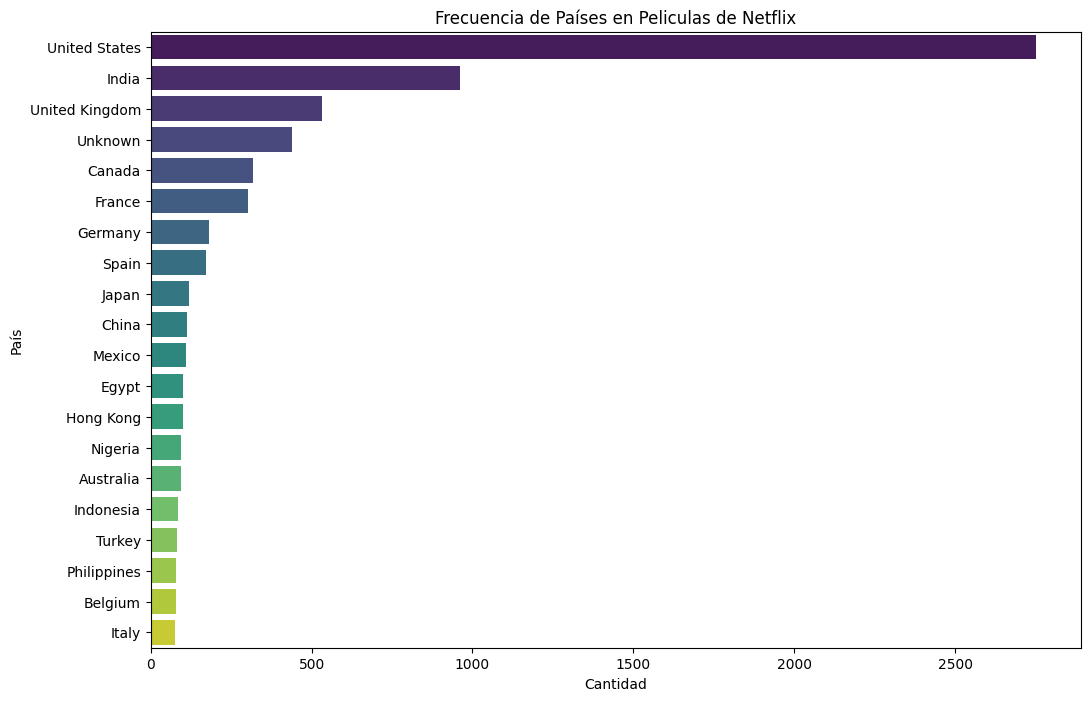

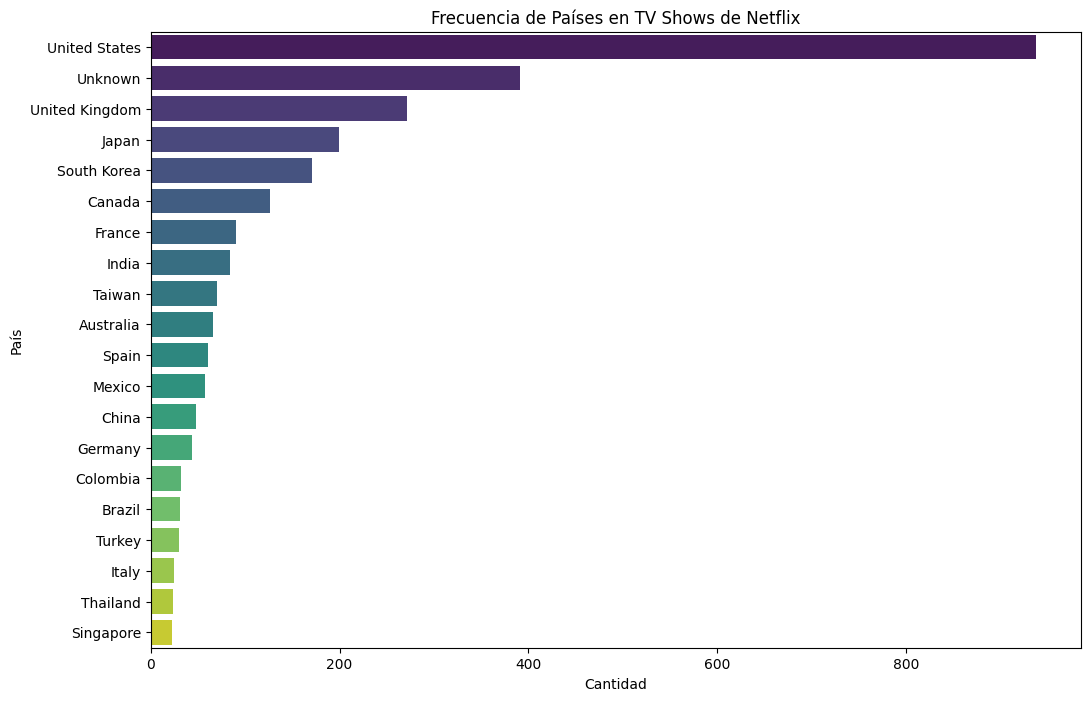

In [118]:
movies_countries = movies['country'].str.split(', ').explode().value_counts().sort_values(ascending=False)
tvshows_countries = tv_shows['country'].str.split(', ').explode().value_counts().sort_values(ascending=False)

print(movies_countries.sort_values(ascending=False).head(20))
print(tvshows_countries.sort_values(ascending=False).head(20))

plt.figure(figsize=(12, 8))
sns.barplot(y=movies_countries.index[:20], x=movies_countries.values[:20], hue=movies_countries.index[:20]  ,dodge=False, palette='viridis')
plt.title('Frecuencia de Países en Peliculas de Netflix')
plt.xlabel('Cantidad')
plt.ylabel('País')
plt.legend([],[], frameon=False)
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(y=tvshows_countries.index[:20], x=tvshows_countries.values[:20], hue=tvshows_countries.index[:20], dodge=False, palette='viridis')
plt.title('Frecuencia de Países en TV Shows de Netflix')
plt.xlabel('Cantidad')
plt.ylabel('País')
plt.legend([],[], frameon=False)
plt.show()

rating
TV-MA        2062
TV-14        1427
R             797
TV-PG         540
PG-13         490
PG            287
TV-Y7         139
TV-Y          131
TV-G          126
NR             75
G              41
TV-Y7-FV        5
NC-17           3
UR              3
Not Rated       2
74 min          1
84 min          1
66 min          1
A               1
Name: count, dtype: int64
rating
TV-MA        1146
TV-14         733
TV-PG         323
TV-Y7         195
TV-Y          176
TV-G           94
NR              5
R               2
Not Rated       2
TV-Y7-FV        1
Name: count, dtype: int64


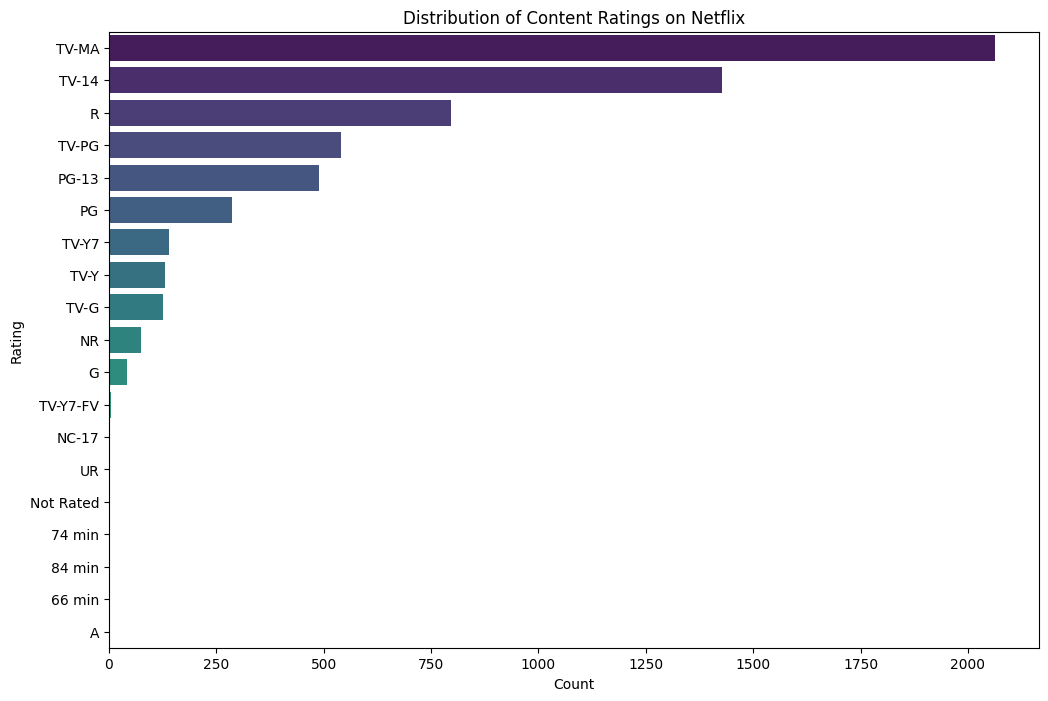

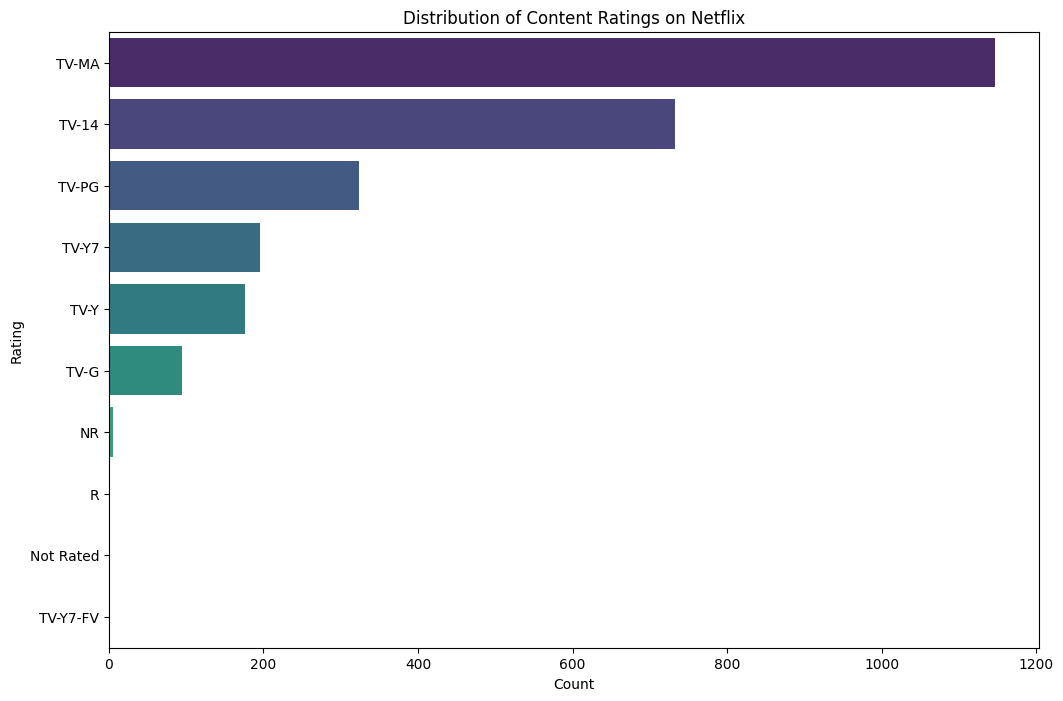

In [121]:
movies_rating_counts = movies['rating'].value_counts()
tvshows_rating_counts = tv_shows['rating'].value_counts()
print(movies_rating_counts)
print(tvshows_rating_counts)

plt.figure(figsize=(12, 8))
sns.barplot(y=movies_rating_counts.index, x=movies_rating_counts.values, hue=movies_rating_counts.index, dodge=False, palette='viridis')
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.legend([],[], frameon=False)
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(y=tvshows_rating_counts.index, x=tvshows_rating_counts.values, hue=tvshows_rating_counts.index, dodge=False, palette='viridis')
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.legend([],[], frameon=False)
plt.show()

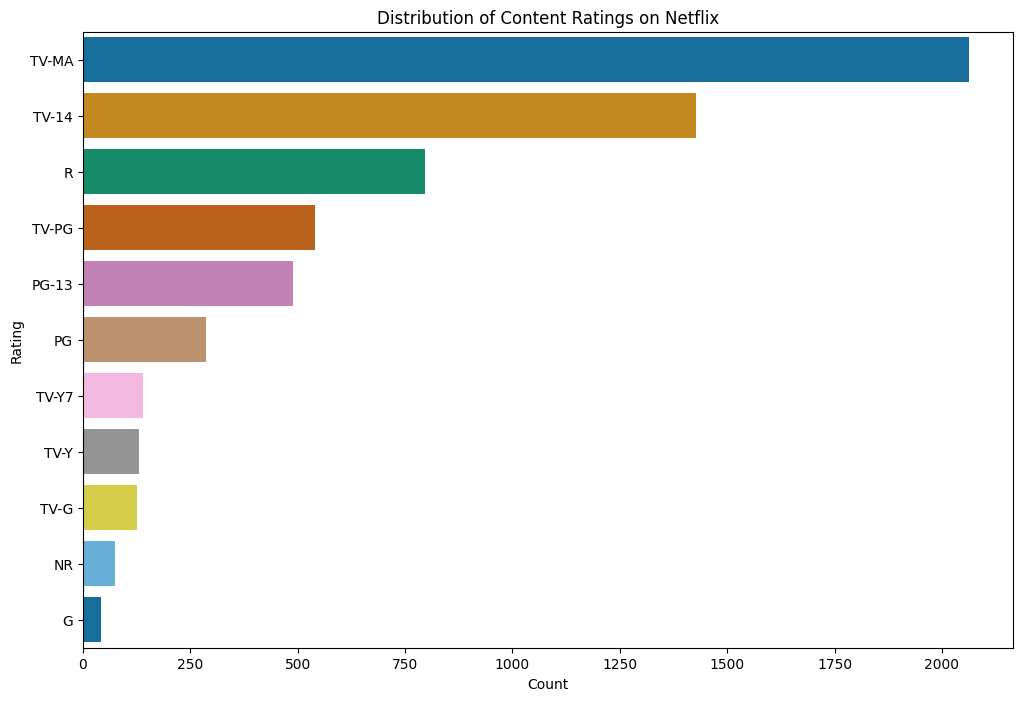

In [122]:
plt.figure(figsize=(12, 8))
sns.barplot(y=movies_rating_counts.index[:11], x=movies_rating_counts.values[:11], hue=movies_rating_counts.index[:11], dodge=False, palette='colorblind')
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.legend([],[], frameon=False)
plt.show()

In [66]:
df.duration.value_counts()

duration
1 Season     1794
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
189 min         1
10 min          1
3 min           1
229 min         1
191 min         1
Name: count, Length: 221, dtype: int64

duration
1 Season      1794
2 Seasons      425
3 Seasons      199
4 Seasons       95
5 Seasons       65
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       7
13 Seasons       3
15 Seasons       2
12 Seasons       2
11 Seasons       2
17 Seasons       1
Name: count, dtype: int64


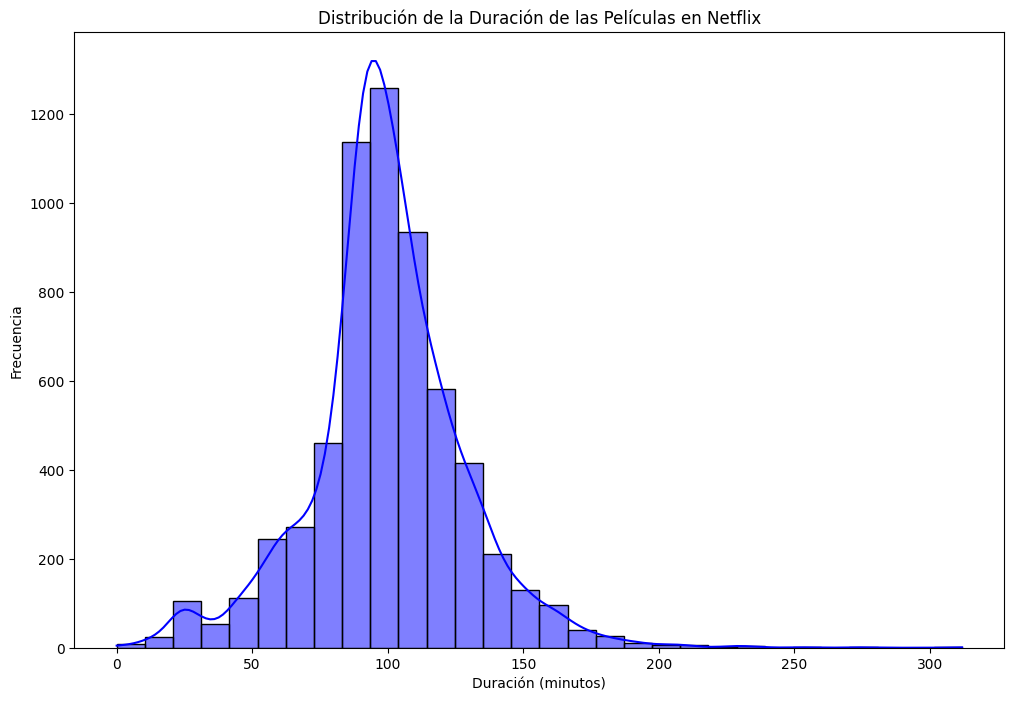

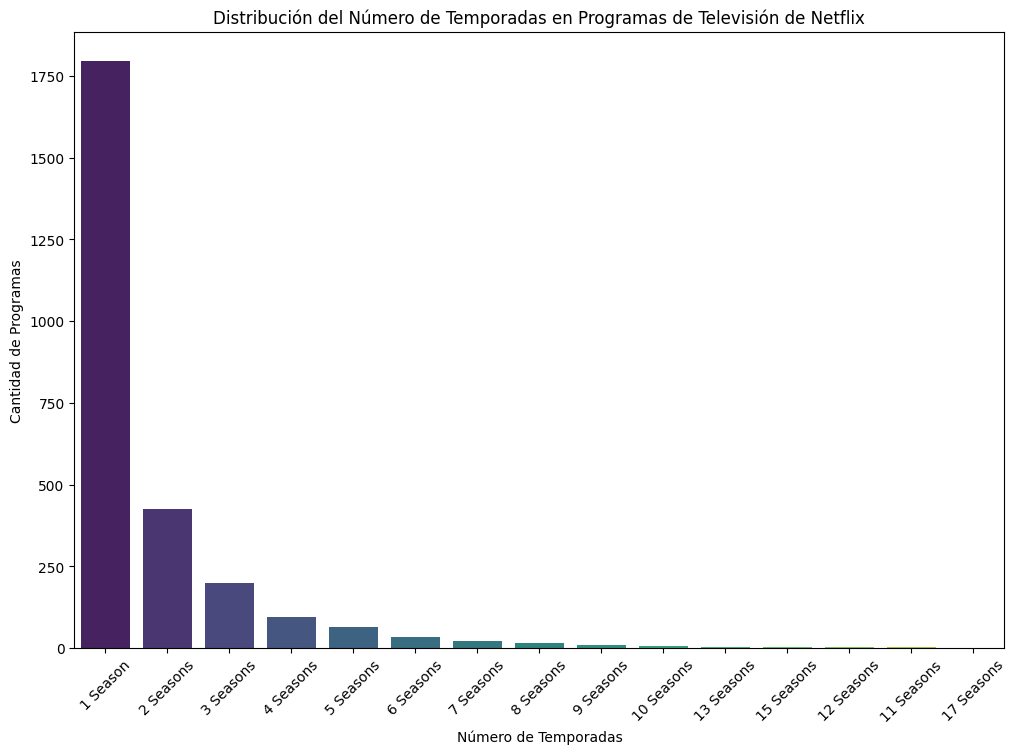

In [189]:

movies.loc[:,'duration_num'] = movies['duration'].apply(lambda x: int(x.split()[0]) if x.split()[0] != 'No' else 0)


movies_duration = movies['duration_num']
seasons_counts = tv_shows['duration'].value_counts().sort_values(ascending=False)

print(seasons_counts)

plt.figure(figsize=(12, 8))
sns.histplot(movies_duration, kde=True, color='blue', bins=30)
plt.title('Distribución de la Duración de las Películas en Netflix')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.show()


plt.figure(figsize=(12, 8))
sns.barplot(x=seasons_counts.index, y=seasons_counts.values, palette='viridis', hue=seasons_counts.index)
plt.title('Distribución del Número de Temporadas en Programas de Televisión de Netflix')
plt.xlabel('Número de Temporadas')
plt.xticks(rotation=45)  
plt.ylabel('Cantidad de Programas')
plt.show()

release_year
1942      2
1943      3
1944      3
1945      3
1946      1
       ... 
2017    767
2018    767
2019    633
2020    517
2021    277
Name: count, Length: 73, dtype: int64
release_year
1925      1
1945      1
1946      1
1963      1
1967      1
1972      1
1974      1
1977      1
1979      1
1981      1
1985      1
1986      2
1988      2
1989      1
1990      3
1991      1
1992      3
1993      4
1994      2
1995      2
1996      3
1997      4
1998      4
1999      7
2000      4
2001      5
2002      7
2003     10
2004      9
2005     13
2006     14
2007     14
2008     23
2009     34
2010     40
2011     40
2012     64
2013     63
2014     88
2015    162
2016    244
2017    265
2018    380
2019    397
2020    436
2021    315
2024      1
Name: count, dtype: int64


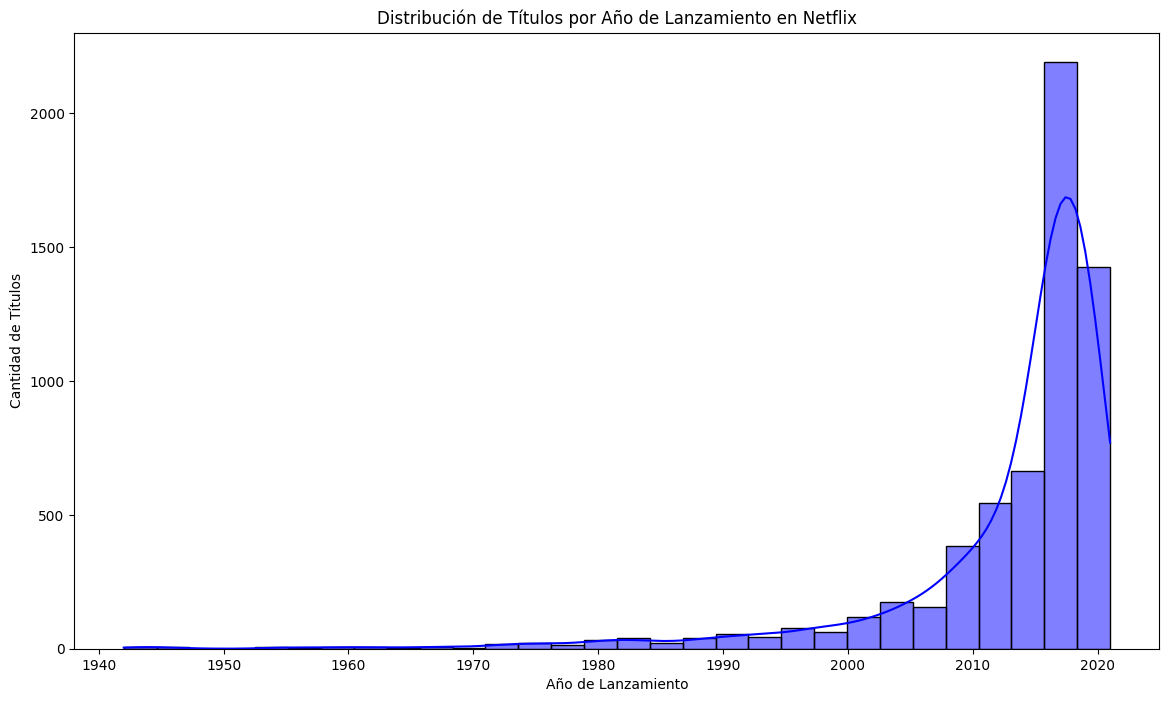

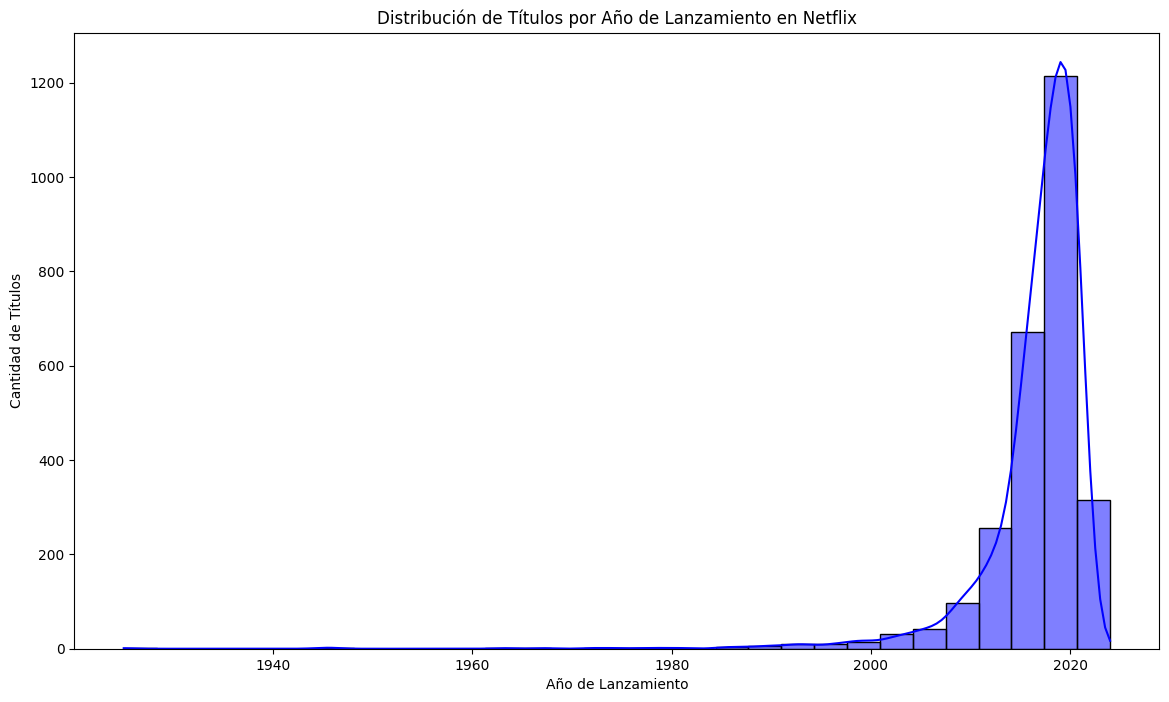

In [140]:
movies_release_year_counts = movies['release_year'].value_counts().sort_index()
tvshows_release_year_counts = tv_shows['release_year'].value_counts().sort_index()
print(movies_release_year_counts)
print(tvshows_release_year_counts)

# Visualización de la distribución de títulos por año de lanzamiento
plt.figure(figsize=(14, 8))
sns.histplot(x=movies['release_year'], kde=True, color='blue', bins=30)
plt.title('Distribución de Títulos por Año de Lanzamiento en Netflix')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Títulos')
plt.show()

plt.figure(figsize=(14, 8))
sns.histplot(x=tv_shows['release_year'], kde=True, color='blue', bins=30)
plt.title('Distribución de Títulos por Año de Lanzamiento en Netflix')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Títulos')
plt.show()

year_added
2008       1
2009       2
2010       1
2011      13
2012       3
2013       6
2014      19
2015      56
2016     253
2017     839
2018    1237
2019    1424
2020    1284
2021     993
2024       1
Name: count, dtype: int64
month_added
1     546
2     382
3     529
4     551
5     439
6     492
7     565
8     519
9     519
10    545
11    498
12    547
Name: count, dtype: int64


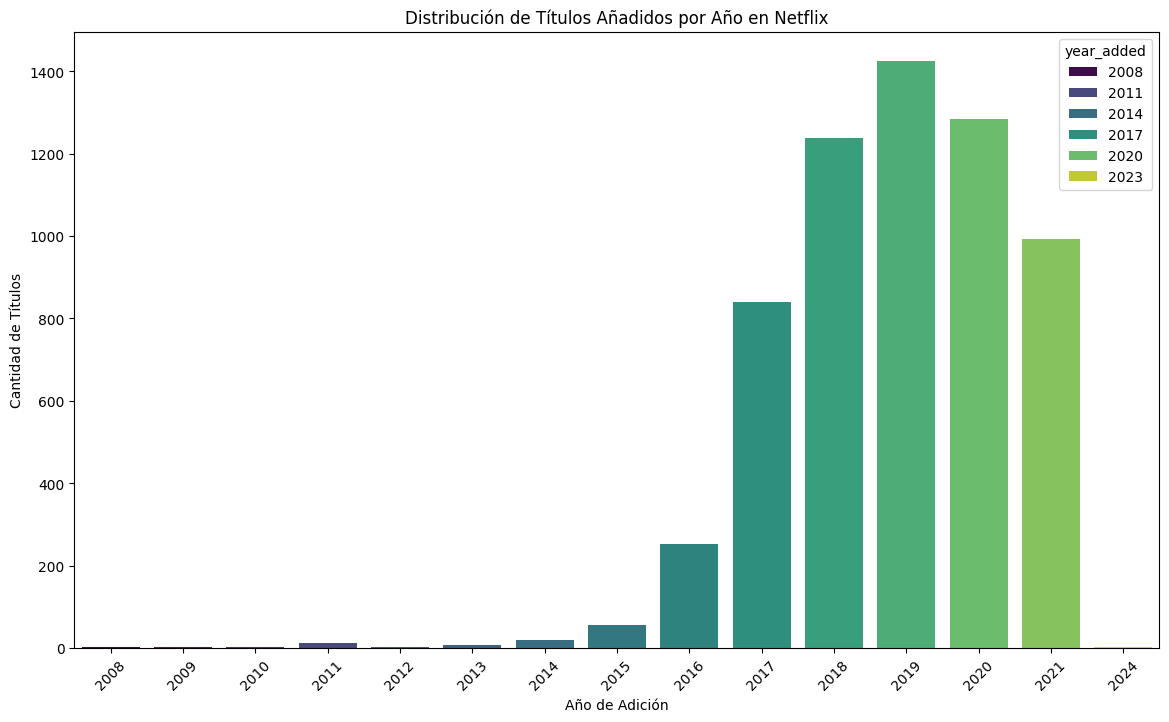

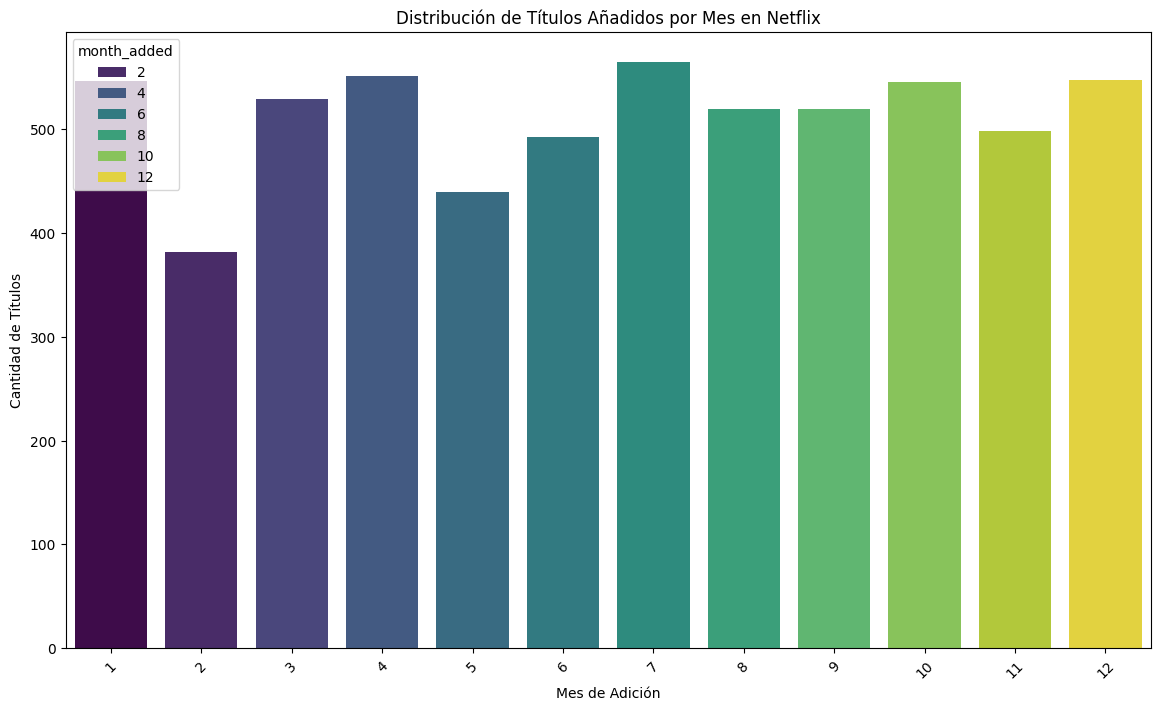

year_added
2000     10
2008      1
2013      5
2014      5
2015     26
2016    176
2017    349
2018    412
2019    592
2020    595
2021    505
2024      1
Name: count, dtype: int64
month_added
1     202
2     181
3     213
4     215
5     193
6     236
7     262
8     236
9     251
10    215
11    207
12    266
Name: count, dtype: int64


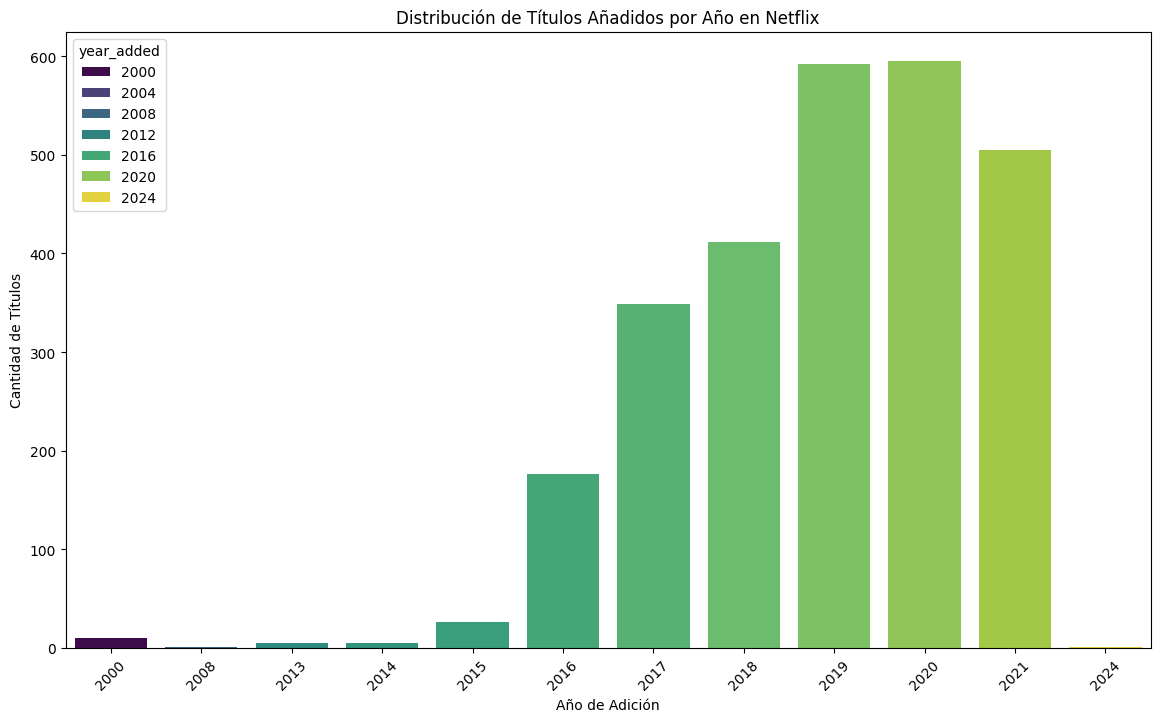

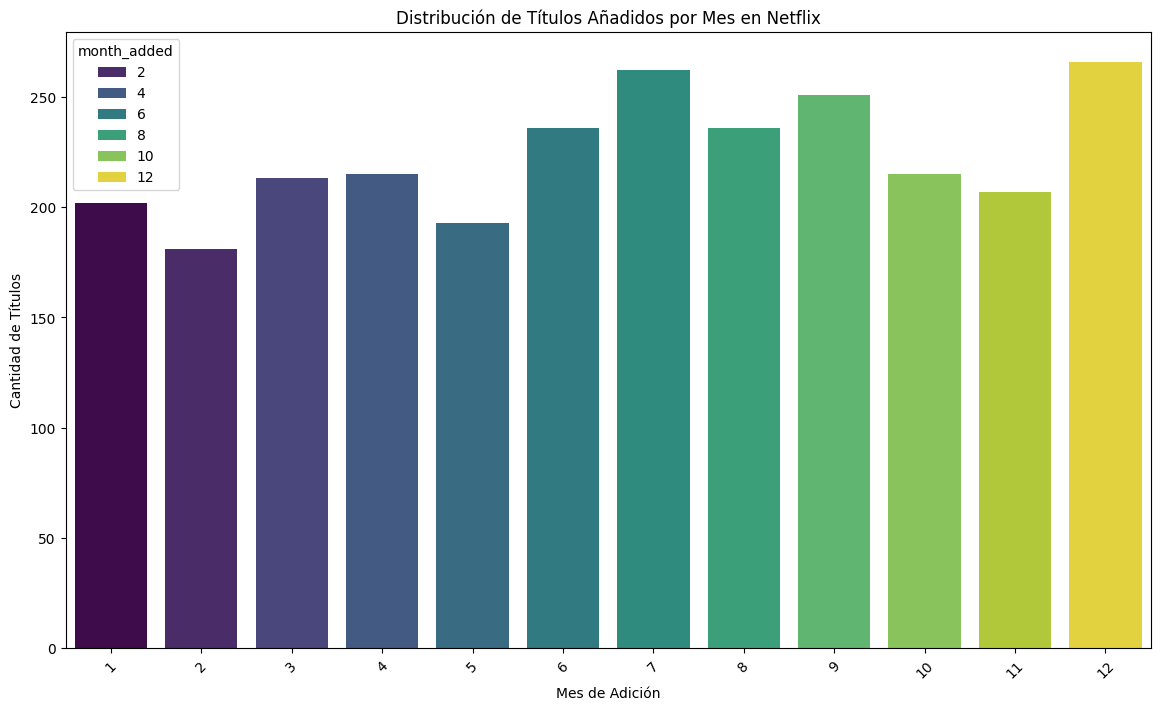

In [146]:

# Extraer el año y el mes de la fecha de adición
movies.loc[:, 'year_added'] = movies['date_added'].dt.year
movies.loc[:, 'month_added'] = movies['date_added'].dt.month

# Contar la cantidad de títulos añadidos por año
movies_year_added_counts = movies['year_added'].value_counts().sort_index()
print(movies_year_added_counts)

# Contar la cantidad de títulos añadidos por mes
movies_month_added_counts = movies['month_added'].value_counts().sort_index()
print(movies_month_added_counts)

# Visualización de la distribución de títulos añadidos por año
plt.figure(figsize=(14, 8))
sns.barplot(x=movies_year_added_counts.index, y=movies_year_added_counts.values, palette='viridis', hue=movies_year_added_counts.index)
plt.title('Distribución de Títulos Añadidos por Año en Netflix')
plt.xlabel('Año de Adición')
plt.ylabel('Cantidad de Títulos')
plt.xticks(rotation=45)  
plt.show()

# Visualización de la distribución de títulos añadidos por mes
plt.figure(figsize=(14, 8))
sns.barplot(x=movies_month_added_counts.index, y=movies_month_added_counts.values, palette='viridis', hue=movies_month_added_counts.index)
plt.title('Distribución de Títulos Añadidos por Mes en Netflix')
plt.xlabel('Mes de Adición')
plt.ylabel('Cantidad de Títulos')
plt.xticks(rotation=45) 
plt.show()


# Extraer el año y el mes de la fecha de adición
tv_shows.loc[:, 'year_added'] = tv_shows['date_added'].dt.year
tv_shows.loc[:, 'month_added'] = tv_shows['date_added'].dt.month

# Contar la cantidad de títulos añadidos por año
tvshows_year_added_counts = tv_shows['year_added'].value_counts().sort_index()
print(tvshows_year_added_counts)

# Contar la cantidad de títulos añadidos por mes
tvshows_month_added_counts = tv_shows['month_added'].value_counts().sort_index()
print(tvshows_month_added_counts)

# Visualización de la distribución de títulos añadidos por año
plt.figure(figsize=(14, 8))
sns.barplot(x=tvshows_year_added_counts.index, y=tvshows_year_added_counts.values, palette='viridis', hue=tvshows_year_added_counts.index)
plt.title('Distribución de Títulos Añadidos por Año en Netflix')
plt.xlabel('Año de Adición')
plt.ylabel('Cantidad de Títulos')
plt.xticks(rotation=45)  
plt.show()

# Visualización de la distribución de títulos añadidos por mes
plt.figure(figsize=(14, 8))
sns.barplot(x=tvshows_month_added_counts.index, y=tvshows_month_added_counts.values, palette='viridis', hue=tvshows_month_added_counts.index)
plt.title('Distribución de Títulos Añadidos por Mes en Netflix')
plt.xlabel('Mes de Adición')
plt.ylabel('Cantidad de Títulos')
plt.xticks(rotation=45) 
plt.show()

listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Horror Movies                357
Stand-Up Comedy              343
Sci-Fi & Fantasy             243
Sports Movies                219
Classic Movies               116
LGBTQ Movies                 102
Anime Features                71
Cult Movies                   71
Faith & Spirituality          65
Movies                        57
Drama                          1
Romance                        1
Thriller                       1
Name: count, dtype: int64
listed_in
International TV Shows          1351
TV Dramas                        763
TV Comedies                      581
Crime TV Shows                   470
Kids' TV                         451
Docuseries

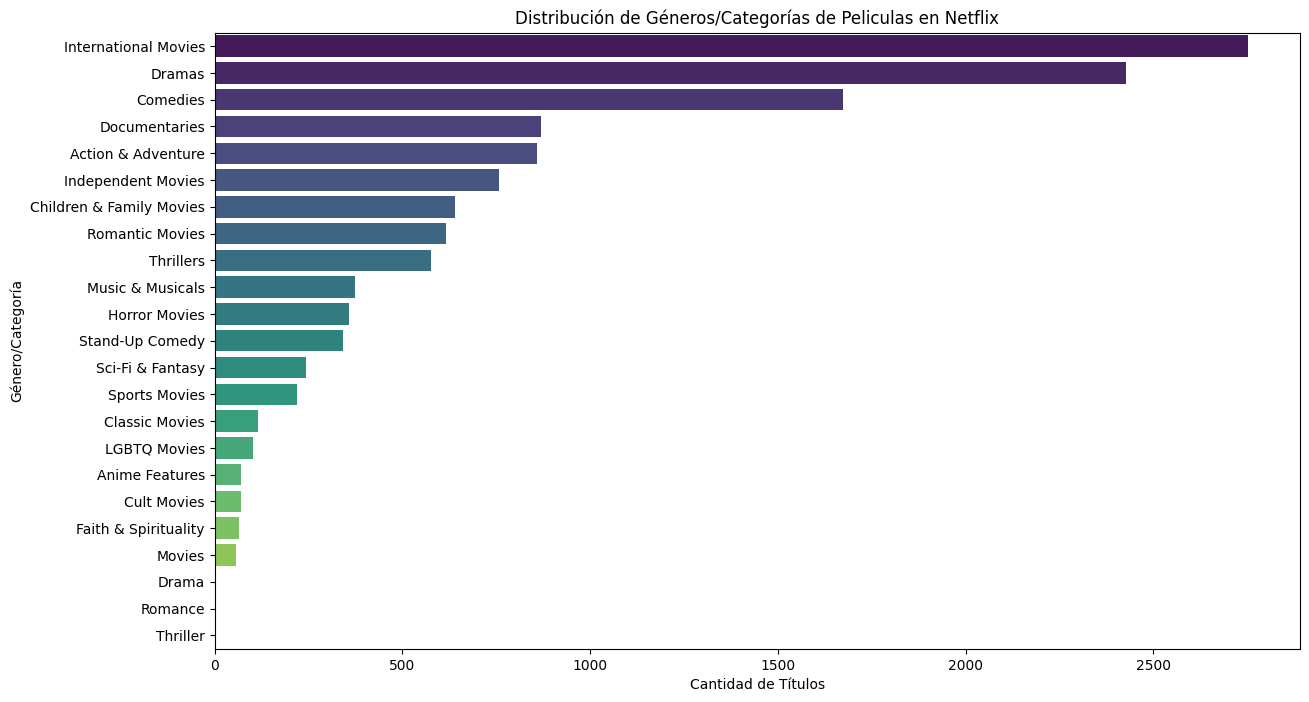

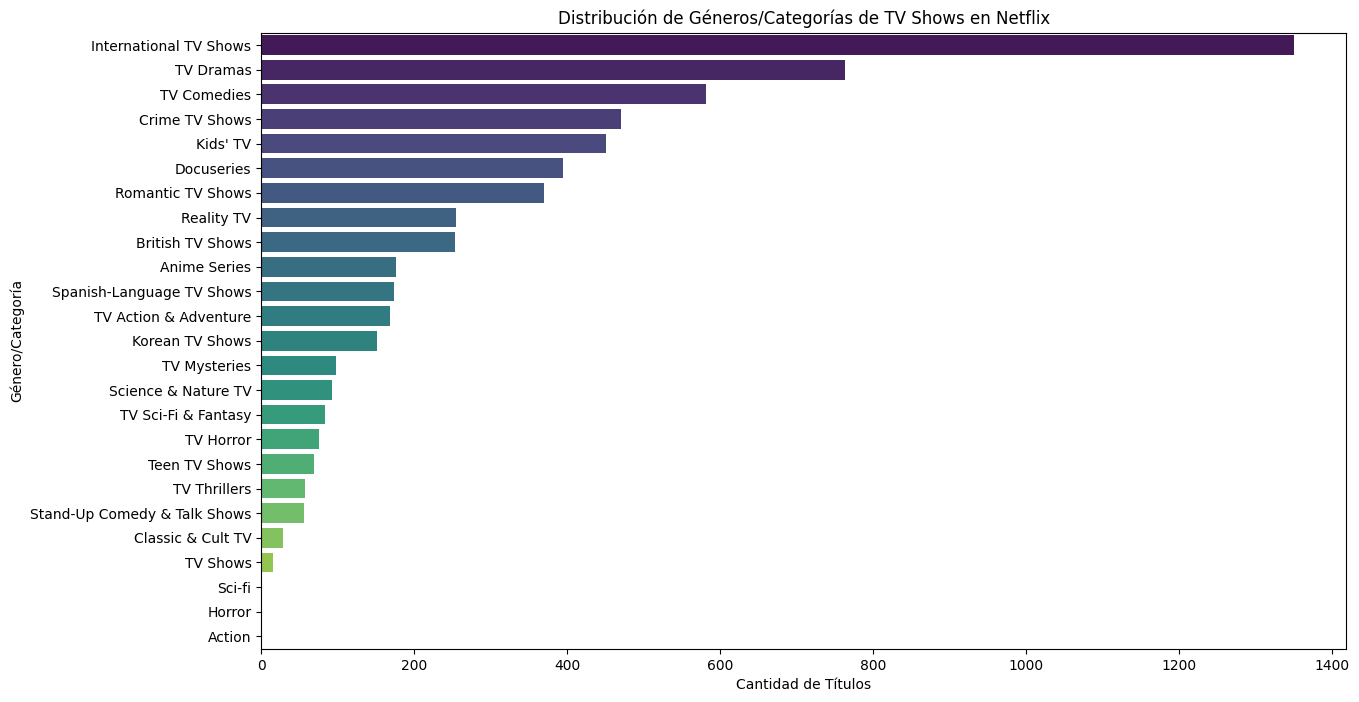

In [151]:
movies_categories = movies['listed_in'].str.split(', ').explode()
tvshows_categories = tv_shows['listed_in'].str.split(', ').explode()

# Contar la ocurrencia de cada género/categoría
movies_category_counts = movies_categories.value_counts()
tvshows_category_counts = tvshows_categories.value_counts()
print(movies_category_counts)
print(tvshows_category_counts)

# Visualización de la distribución de géneros/categorías
plt.figure(figsize=(14, 8))
sns.barplot(y=movies_category_counts.index[:25], x=movies_category_counts.values[:25], palette='viridis', hue=movies_category_counts.index[:25])
plt.title('Distribución de Géneros/Categorías de Peliculas en Netflix')
plt.xlabel('Cantidad de Títulos')
plt.ylabel('Género/Categoría')
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(y=tvshows_category_counts.index[:25], x=tvshows_category_counts.values[:25], palette='viridis', hue=tvshows_category_counts.index[:25])
plt.title('Distribución de Géneros/Categorías de TV Shows en Netflix')
plt.xlabel('Cantidad de Títulos')
plt.ylabel('Género/Categoría')
plt.show()

director
Rajiv Chilaka          22
Jan Suter              21
RaÃºl Campos           19
Suhas Kadav            16
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Martin Scorsese        12
Youssef Chahine        12
Jay Chapman            12
Steven Spielberg       11
Don Michael Paul       10
YÄ±lmaz ErdoÄŸan        9
Anurag Kashyap          9
Shannon Hartman         9
David Dhawan            9
Robert Rodriguez        8
Hanung Bramantyo        8
Kunle Afolayan          8
Johnnie To              8
Name: count, dtype: int64


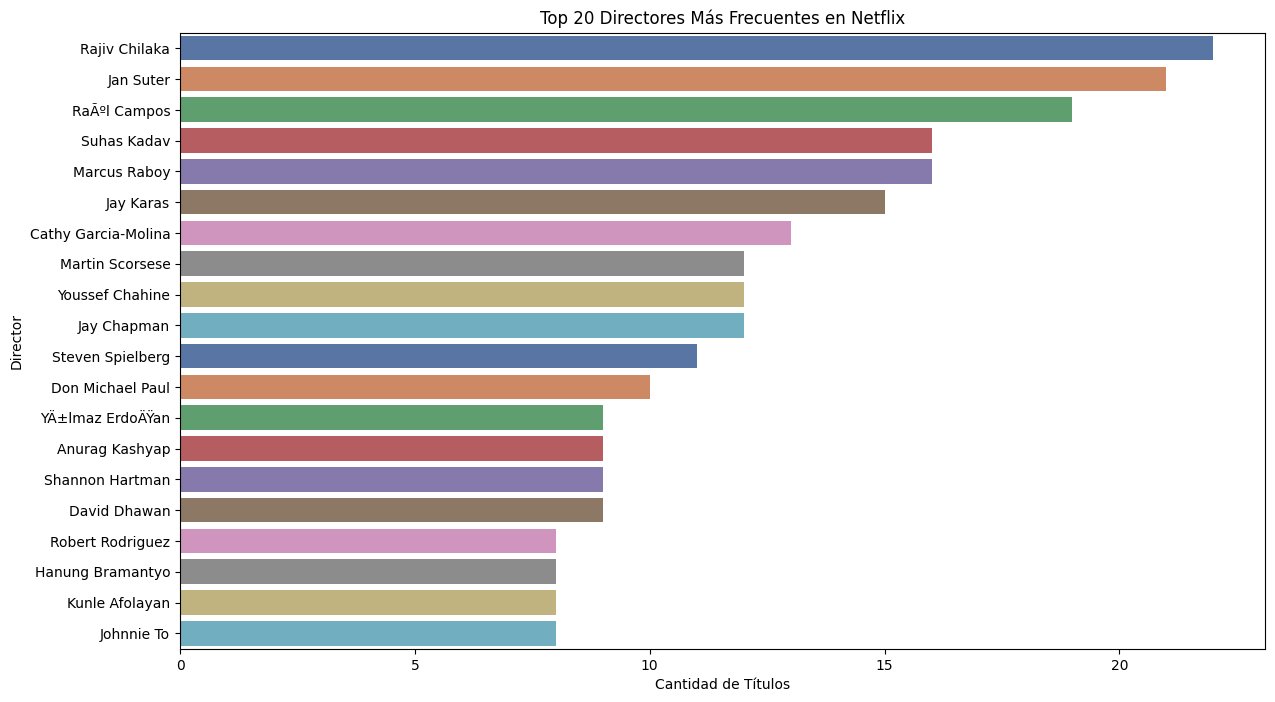

In [188]:
df_directors = df['director'].str.split(', ').explode()
df_directors = df_directors[df_directors != 'Unknown']

director_counts = df_directors.value_counts().head(20)  
print(director_counts)


plt.figure(figsize=(14, 8))
sns.barplot(y=director_counts.index, x=director_counts.values, palette='deep', hue=director_counts.index)
plt.title('Top 20 Directores Más Frecuentes en Netflix')
plt.xlabel('Cantidad de Títulos')
plt.ylabel('Director')
plt.show()

cast
Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Takahiro Sakurai     32
Naseeruddin Shah     32
Rupa Bhimani         31
Akshay Kumar         30
Om Puri              30
Yuki Kaji            29
Paresh Rawal         28
Amitabh Bachchan     28
Boman Irani          27
Rajesh Kava          26
Vincent Tong         26
Kareena Kapoor       25
Andrea Libman        25
Samuel L. Jackson    24
John Cleese          24
Jigna Bhardwaj       23
Fred Tatasciore      23
Name: count, dtype: int64


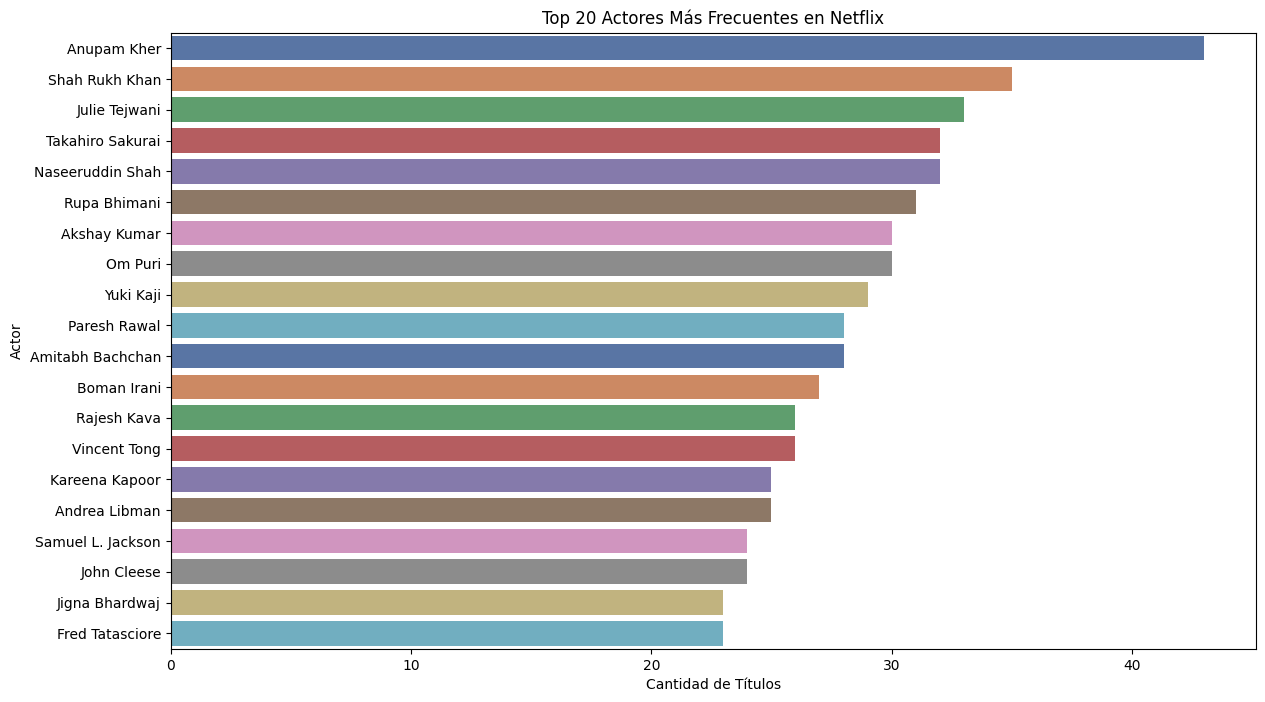

In [186]:
df_actors = df['cast'].str.split(', ').explode()
df_actors = df_actors[df_actors != 'Unknown']

# Contar la ocurrencia de cada actor
actor_counts = df_actors.value_counts().head(20)  # Top 20 actores más frecuentes
print(actor_counts)

# Visualización de la distribución de actores
plt.figure(figsize=(14, 8))
sns.barplot(y=actor_counts.index, x=actor_counts.values, palette='deep', hue=actor_counts.index)
plt.title('Top 20 Actores Más Frecuentes en Netflix')
plt.xlabel('Cantidad de Títulos')
plt.ylabel('Actor')
plt.show()

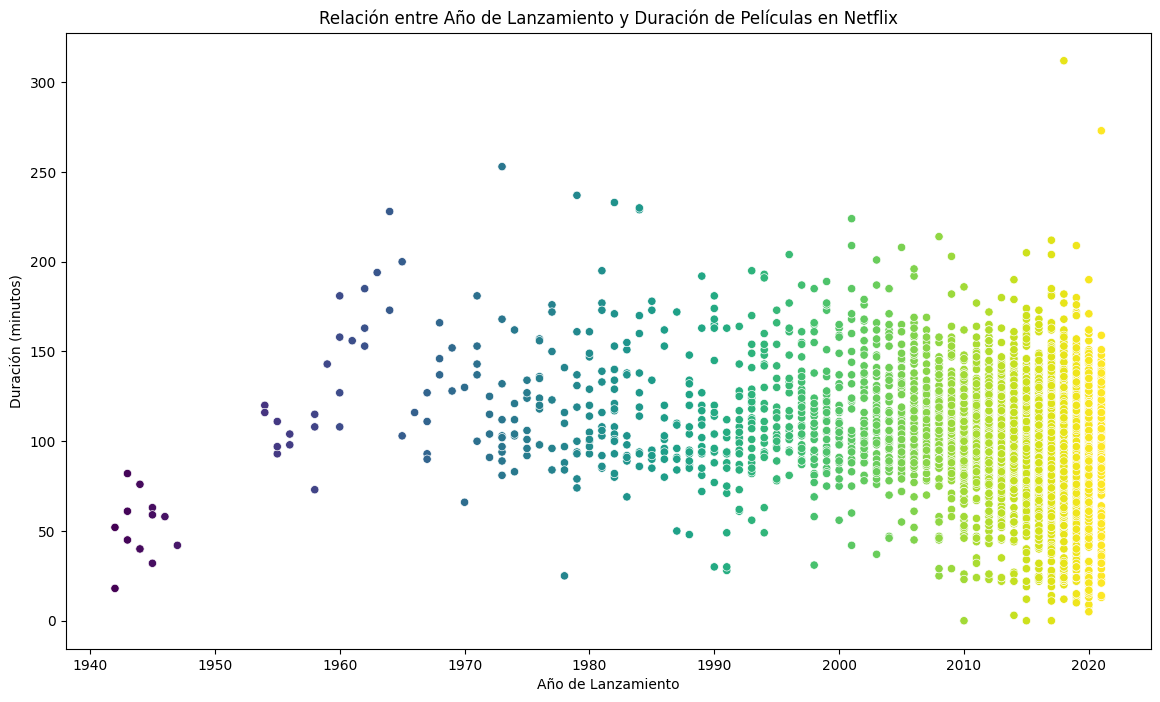

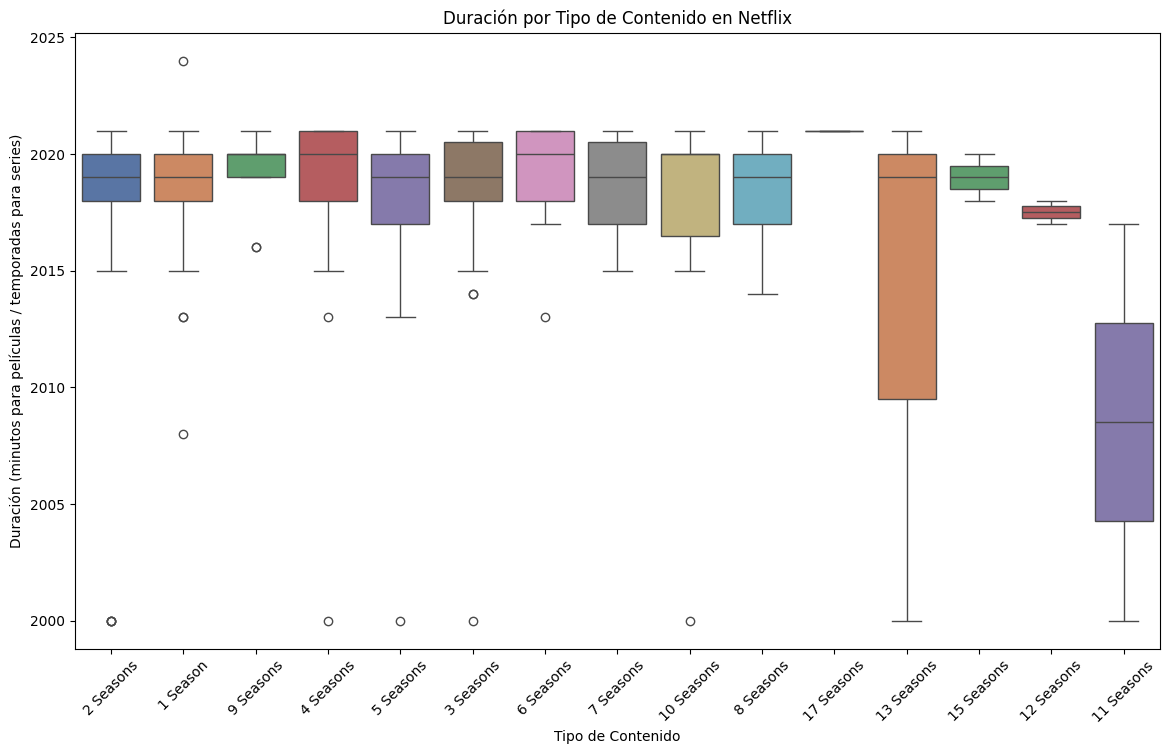

In [180]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=movies, x='release_year', y='duration_num', hue='release_year', palette='viridis', legend=False)
plt.title('Relación entre Año de Lanzamiento y Duración de Películas en Netflix')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Duración (minutos)')
plt.show()

# Gráfico de dispersión para series
plt.figure(figsize=(14, 8))
sns.boxplot(x='duration', y='year_added', data=tv_shows, palette='deep', hue='duration')
plt.title('Duración por Tipo de Contenido en Netflix')
plt.xlabel('Tipo de Contenido')
plt.xticks(rotation=45)
plt.ylabel('Duración (minutos para películas / temporadas para series)')
plt.show()


year_added
2000      10
2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     429
2017    1188
2018    1649
2019    2016
2020    1879
2021    1498
2024       2
Name: count, dtype: int64


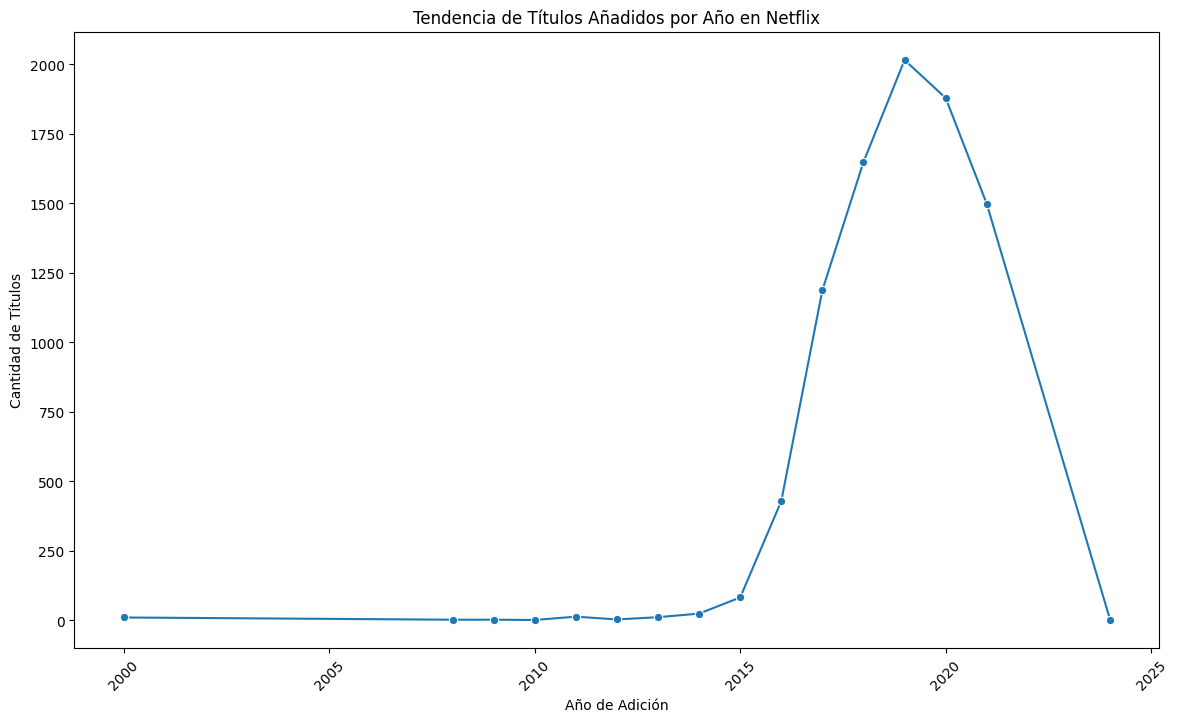

month_added
1     748
2     563
3     742
4     766
5     632
6     728
7     827
8     755
9     770
10    760
11    705
12    813
Name: count, dtype: int64


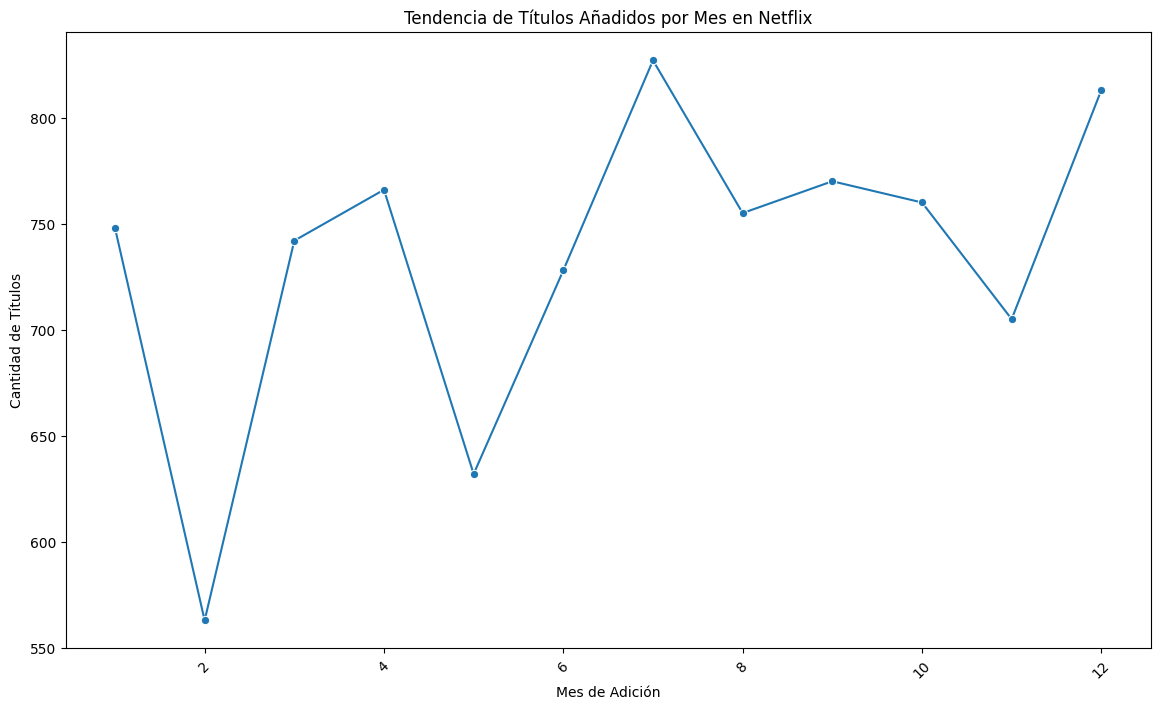

In [185]:
year_added_counts = df['year_added'].value_counts().sort_index()
print(year_added_counts)

# Visualización de la tendencia de títulos añadidos por año
plt.figure(figsize=(14, 8))
sns.lineplot(x=year_added_counts.index, y=year_added_counts.values, marker='o')
plt.title('Tendencia de Títulos Añadidos por Año en Netflix')
plt.xlabel('Año de Adición')
plt.ylabel('Cantidad de Títulos')
plt.xticks(rotation=45)  
plt.show()

month_added_counts = df['month_added'].value_counts().sort_index()
print(month_added_counts)

# Visualización de la tendencia de títulos añadidos por mes
plt.figure(figsize=(14, 8))
sns.lineplot(x=month_added_counts.index, y=month_added_counts.values, marker='o')
plt.title('Tendencia de Títulos Añadidos por Mes en Netflix')
plt.xlabel('Mes de Adición')
plt.ylabel('Cantidad de Títulos')
plt.xticks(rotation=45) 
plt.show()